In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [2]:
dataset = dataset.iloc[:,2:]
dataset.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    float64
 1   EstimatedSalary  400 non-null    float64
 2   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


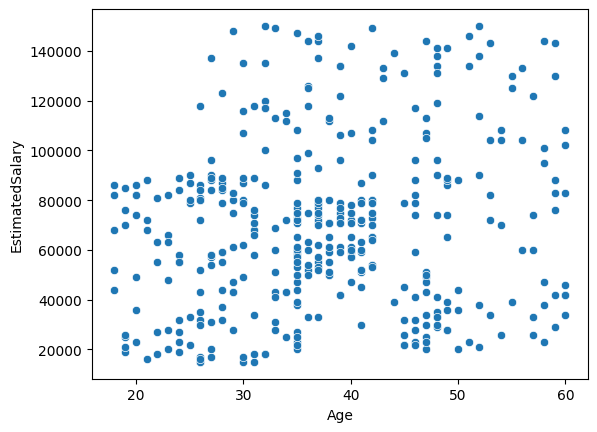

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = dataset.iloc[:,0], y = dataset.iloc[:,1], data= dataset)
plt.show()

In [7]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [8]:
x.head()

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=53)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

# First approach - Without feature scaling and early stopping

In [12]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000)

Epoch 1/1000
10/10 [==============================] - 2s 33ms/step - loss: 74547456.0000 - accuracy: 0.6656 - val_loss: 0.6928 - val_accuracy: 0.5250
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.6719 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.6719 - val_loss: 0.6922 - val_accuracy: 0.5250
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.6719 - val_loss: 0.6920 - val_accuracy: 0.5250
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.6719 - val_loss: 0.6919 - val_accuracy: 0.5250
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6791 - accuracy: 0.6719 - val_loss: 0.6919 - val_accuracy: 0.5250
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6769 - accuracy: 0.6719 - val_loss: 0.6919 - val_accuracy: 0.525

KeyboardInterrupt: 

In [15]:
history

import numpy as np
import pandas as pd
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()
dataset = dataset.iloc[:,2:]
dataset.head()
dataset.info()
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(dataset[:,0], dataset[:,1])
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = dataset[:,0], y = dataset[:,1], data= dataset)
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = dataset.iloc[:,0], y = dataset.iloc[:,1], data= dataset)
plt.show()
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x.head()
y.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=53)
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(o

# Approach no 2 - with feature scaling **Mandatory steps**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler  = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [17]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
history1 = model1.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=1000)

Epoch 1/1000
10/10 [==============================] - 2s 65ms/step - loss: 0.6844 - accuracy: 0.5562 - val_loss: 0.6606 - val_accuracy: 0.6875
Epoch 2/1000
10/10 [==============================] - 0s 26ms/step - loss: 0.6668 - accuracy: 0.6656 - val_loss: 0.6489 - val_accuracy: 0.7750
Epoch 3/1000
10/10 [==============================] - 0s 18ms/step - loss: 0.6505 - accuracy: 0.7281 - val_loss: 0.6378 - val_accuracy: 0.7750
Epoch 4/1000
10/10 [==============================] - 0s 21ms/step - loss: 0.6353 - accuracy: 0.7844 - val_loss: 0.6274 - val_accuracy: 0.8250
Epoch 5/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.6210 - accuracy: 0.8531 - val_loss: 0.6175 - val_accuracy: 0.9000
Epoch 6/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.6076 - accuracy: 0.8625 - val_loss: 0.6082 - val_accuracy: 0.8875
Epoch 7/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.5950 - accuracy: 0.8562 - val_loss: 0.5993 - val_accuracy: 0.8875

KeyboardInterrupt: 

# Approach 3 - pls user feature scaling in all the dataset - mandatory
# and on the top of it , use early stopping to handle overfitting problem and also it executed very fast

In [18]:
# Early Stopping
from keras.callbacks import EarlyStopping

In [23]:
callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [24]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
history2 = model2.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=5000,callbacks= callback)

Epoch 1/5000
10/10 [==============================] - 1s 21ms/step - loss: 0.6842 - accuracy: 0.7250 - val_loss: 0.7109 - val_accuracy: 0.5625
Epoch 2/5000
10/10 [==============================] - 0s 7ms/step - loss: 0.6671 - accuracy: 0.7531 - val_loss: 0.6970 - val_accuracy: 0.5750
Epoch 3/5000
10/10 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.7594 - val_loss: 0.6837 - val_accuracy: 0.6000
Epoch 4/5000
10/10 [==============================] - 0s 7ms/step - loss: 0.6357 - accuracy: 0.7625 - val_loss: 0.6712 - val_accuracy: 0.6000
Epoch 5/5000
10/10 [==============================] - 0s 7ms/step - loss: 0.6214 - accuracy: 0.7531 - val_loss: 0.6592 - val_accuracy: 0.6125
Epoch 6/5000
10/10 [==============================] - 0s 5ms/step - loss: 0.6080 - accuracy: 0.7594 - val_loss: 0.6478 - val_accuracy: 0.6125
Epoch 7/5000
10/10 [==============================] - 0s 5ms/step - loss: 0.5951 - accuracy: 0.7656 - val_loss: 0.6370 - val_accuracy: 0.6500
Epoch

# Regularization Method
# Purpose - To handle overfitting problem

In [25]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=keras.regularizers.l1(0.001)))
# L1 = Lasso, most of the co-efficient is either closer to zero or exact zero
# L2 = Ridge, all of the co-efficient is only closer to zero and not exact zero
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
history3 = model3.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=5000,callbacks= callback)

Epoch 1/5000
10/10 [==============================] - 3s 21ms/step - loss: 0.7162 - accuracy: 0.5500 - val_loss: 0.7348 - val_accuracy: 0.5000
Epoch 2/5000
10/10 [==============================] - 0s 7ms/step - loss: 0.6979 - accuracy: 0.6125 - val_loss: 0.7208 - val_accuracy: 0.5250
Epoch 3/5000
10/10 [==============================] - 0s 6ms/step - loss: 0.6808 - accuracy: 0.6656 - val_loss: 0.7076 - val_accuracy: 0.5875
Epoch 4/5000
10/10 [==============================] - 0s 6ms/step - loss: 0.6649 - accuracy: 0.7250 - val_loss: 0.6950 - val_accuracy: 0.6000
Epoch 5/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6500 - accuracy: 0.7625 - val_loss: 0.6831 - val_accuracy: 0.6000
Epoch 6/5000
10/10 [==============================] - 0s 7ms/step - loss: 0.6360 - accuracy: 0.7688 - val_loss: 0.6717 - val_accuracy: 0.6250
Epoch 7/5000
10/10 [==============================] - 0s 7ms/step - loss: 0.6229 - accuracy: 0.7906 - val_loss: 0.6608 - val_accuracy: 0.6875
Epoch

In [27]:
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=keras.regularizers.l2(0.03)))
# L1 = Lasso, most of the co-efficient is either closer to zero or exact zero
# L2 = Ridge, all of the co-efficient is only closer to zero and not exact zero
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 3s 55ms/step - loss: 0.8372 - accuracy: 0.5875 - val_loss: 0.8631 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.8157 - accuracy: 0.6781 - val_loss: 0.8442 - val_accuracy: 0.5250
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.7958 - accuracy: 0.7000 - val_loss: 0.8266 - val_accuracy: 0.5375
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.7775 - accuracy: 0.7125 - val_loss: 0.8103 - val_accuracy: 0.5375
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.7604 - accuracy: 0.6938 - val_loss: 0.7949 - val_accuracy: 0.5375
Epoch 6/100
10/10 [==============================] - 0s 23ms/step - loss: 0.7444 - accuracy: 0.6938 - val_loss: 0.7806 - val_accuracy: 0.5500
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.7295 - accuracy: 0.7000 - val_loss: 0.7671 - val_accuracy: 0.5625
Epoch 